In [1]:
#importing necessary tools
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import types
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, f1_score, jaccard_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.model_selection import cross_validate
from statistics import mean
%matplotlib inline

In [2]:
train_df = pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')
example_df = pd.read_csv('titanic_gender_submission.csv')

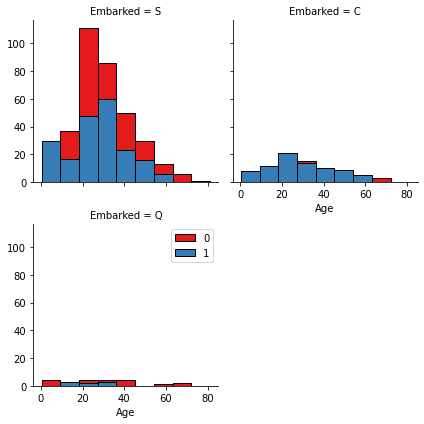

In [3]:
bins = np.linspace(train_df.Age.min(), train_df.Age.max()+1, 10)
g = sns.FacetGrid(train_df, col="Embarked", hue="Survived", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()


# Training Dataframe Preparation

In [4]:
modelling_df = train_df.copy()
modelling_df['Child'] = modelling_df['Age']<18
modelling_df['Child'].replace([True, False], [1, 0], inplace = True)
modelling_df.shape

(891, 13)

In [5]:
new_age_features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Child']
no_age_features = ['Pclass', 'Sex', 'Fare', 'Embarked']

In [6]:
modelling_df['Embarked'].replace(['Q', 'S', 'C'], [0, 1, 2], inplace = True)
modelling_df['Sex'].replace(['male', 'female'], [0, 1], inplace = True)

In [7]:
for feature in no_age_features:
    for number in modelling_df.index:
        if pd.isna(modelling_df.loc[number, feature]):
            modelling_df.drop(index = number, inplace = True)
modelling_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,1.0,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,1.0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,1.0,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,2.0,0


In [8]:
age_replace = modelling_df[pd.isna(modelling_df['Age'])].index.tolist()
no_age_modelling = modelling_df.iloc[age_replace]
age_modelling = modelling_df.drop(index = age_replace)

In [9]:
age_survived_values = age_modelling['Survived'].tolist()
no_age_survived_values = no_age_modelling['Survived'].tolist()
age_y = np.array(age_survived_values)
no_age_y = np.array(no_age_survived_values)

transformed_df = pd.DataFrame(columns = features)
for row in rows:
    a_series = pd.Series(row, index = transformed_df.columns)
    transformed_df = transformed_df.append(a_series, ignore_index=True)
transformed_df['Survived'] = survived_values
transformed_df.corr()##

In [10]:
age_train_X = age_modelling[new_age_features]
no_age_train_X = no_age_modelling[no_age_features]
age_train_X = preprocessing.StandardScaler().fit(age_train_X).transform(age_train_X.astype(float))
no_age_train_X = preprocessing.StandardScaler().fit(no_age_train_X).transform(no_age_train_X.astype(float))
age_train_X [0:5]

array([[ 0.90859974, -0.75613751, -0.52766856, -0.51637992, -0.31923045,
        -0.43433598],
       [-1.48298257,  1.32251077,  0.57709388,  0.69404605,  1.9091233 ,
        -0.43433598],
       [ 0.90859974,  1.32251077, -0.25147795, -0.50362035, -0.31923045,
        -0.43433598],
       [-1.48298257,  1.32251077,  0.36995092,  0.35032585, -0.31923045,
        -0.43433598],
       [ 0.90859974, -0.75613751,  0.36995092, -0.50125747, -0.31923045,
        -0.43433598]])

In [11]:
age_y[0:5]

array([0, 1, 1, 1, 0])

# Preparing Prediction Data

In [12]:
predicting_df = test_df.copy()
predicting_df['Child'] = predicting_df['Age']<18
predicting_df['Child'].replace([True, False], [1, 0], inplace = True)
predicting_df.shape

(418, 12)

In [13]:
predicting_df['Embarked'].replace(['Q', 'S', 'C'], [0, 1, 2], inplace = True)
predicting_df['Sex'].replace(['male', 'female'], [0, 1], inplace = True)

In [14]:
fare_nan_replace = predicting_df[pd.isna(predicting_df['Fare'])].index.tolist()

In [15]:
predicting_df.loc[fare_nan_replace, 'Fare'] = 12

In [16]:
age_nan_replace = predicting_df[pd.isna(predicting_df['Age'])].index.tolist()
no_age_predicting = predicting_df.iloc[age_nan_replace]
age_predicting = predicting_df.drop(index = age_nan_replace)

In [17]:
age_test_X = age_predicting[new_age_features]
no_age_test_X = no_age_predicting[no_age_features]
age_test_X = preprocessing.StandardScaler().fit(age_test_X).transform(age_test_X.astype(float))
no_age_test_X = preprocessing.StandardScaler().fit(no_age_test_X).transform(no_age_test_X.astype(float))
age_test_X [0:5]

array([[ 1.01232494, -0.78709097,  0.29854934, -0.54148621, -2.22900041,
        -0.37535779],
       [ 1.01232494,  1.27050117,  1.18132793, -0.55506529, -0.34117353,
        -0.37535779],
       [-0.17109717, -0.78709097,  2.24066224, -0.51105446, -2.22900041,
        -0.37535779],
       [ 1.01232494, -0.78709097, -0.23111782, -0.52783999, -0.34117353,
        -0.37535779],
       [ 1.01232494,  1.27050117, -0.58422925, -0.46847654, -0.34117353,
        -0.37535779]])

# Modelling with age

In [19]:
#list of scorers I will use
scoring = ['accuracy', 'f1_weighted', 'jaccard_weighted']
for scorer in scoring:
    #making variables for each scorer
    globals()['neighbors_'+scorer] = []
    for k in range(1, 10):
        #making a model for each k
        neigh = KNeighborsClassifier(n_neighbors = k)
        #evaluating the model with each scorer and storing the results in a list for each scorer
        globals()['neighbors_'+scorer].append(cross_validate(neigh, age_train_X, age_y, scoring = scorer)['test_score'].mean())
#averaging the score from each scorer for each k value and finding the best k
average_neighbor_score = [(x + y + z)/3 for x, y, z in zip(neighbors_accuracy, neighbors_f1_weighted, neighbors_jaccard_weighted)]
best_k = average_neighbor_score.index(max(average_neighbor_score))
#getting each score for the best k
for scorer in scoring:
    globals()['best_'+scorer] = globals()['neighbors_'+scorer][best_k]
#printing results
age_neigh = KNeighborsClassifier(n_neighbors = best_k).fit(age_train_X, age_y)
print('The best k was {}, with a f1_score of {}, a jaccard_score of {}, an accuracy score of {}, and an overall score of {}'.format(best_k, best_f1_weighted, best_jaccard_weighted, best_accuracy, mean([best_f1_weighted, best_jaccard_weighted, best_accuracy])))

The best k was 6, with a f1_score of 0.7951591140895167, a jaccard_score of 0.6638593850187638, an accuracy score of 0.7978233034571063, and an overall score of 0.7522806008551289


In [20]:
#list of scorers I will use
scoring = ['accuracy', 'f1_weighted', 'jaccard_weighted']
for scorer in scoring:
    #making variables for each scorer
    globals()['neighbors_'+scorer] = []
    for k in range(1, 10):
        #making a model for each k
        neigh = KNeighborsClassifier(n_neighbors = k)
        #evaluating the model with each scorer and storing the results in a list for each scorer
        globals()['neighbors_'+scorer].append(cross_validate(neigh, no_age_train_X, no_age_y, scoring = scorer)['test_score'].mean())
#averaging the score from each scorer for each k value and finding the best k
average_neighbor_score = [(x + y + z)/3 for x, y, z in zip(neighbors_accuracy, neighbors_f1_weighted, neighbors_jaccard_weighted)]
best_k = average_neighbor_score.index(max(average_neighbor_score))
#getting each score for the best k
for scorer in scoring:
    globals()['best_'+scorer] = globals()['neighbors_'+scorer][best_k]
#printing results
no_age_neigh = KNeighborsClassifier(n_neighbors = best_k).fit(no_age_train_X, no_age_y)
print('The best k was {}, with a f1_score of {}, a jaccard_score of {}, an accuracy score of {}, and an overall score of {}'.format(best_k, best_f1_weighted, best_jaccard_weighted, best_accuracy, mean([best_f1_weighted, best_jaccard_weighted, best_accuracy])))

The best k was 5, with a f1_score of 0.7710570770330991, a jaccard_score of 0.6352195687391766, an accuracy score of 0.7801587301587303, and an overall score of 0.728811791977002


# SVM

In [21]:
#making list of c values
c_list = np.arange(.01, 0.1, 0.01).tolist()
for scorer in scoring:
    #making variable for each scorer
    globals()['svm_'+scorer] = []
    for c in c_list:
        #creating model for each c value
        SVM1 = svm.SVC(C=c, kernel='linear')
        #evaluating the model with each scorer and storing the results in a list for each scorer
        globals()['svm_'+scorer].append(cross_validate(SVM1, age_train_X, age_y, scoring = scorer)['test_score'].mean())
#averaging the score from each scorer for each c value and finding the best c
average_svm_score = [(x + y + z)/3 for x, y, z in zip(svm_accuracy, svm_f1_weighted, svm_jaccard_weighted)]
best_c = c_list[average_svm_score.index(max(average_svm_score))]
for scorer in scoring:
    #getting each score for the best c
    globals()['best_'+scorer] = globals()['svm_'+scorer][c_list.index(best_c)]
#printing the results
age_SVM = svm.SVC(C=best_c, kernel='linear').fit(age_train_X, age_y)
print('The best c was {}, with a f1_score of {}, a jaccard_score of {}, an accuracy score of {}, and an overall score of {}'.format(best_c, best_f1_weighted, best_jaccard_weighted, best_accuracy, mean([best_f1_weighted, best_jaccard_weighted, best_accuracy])))

The best c was 0.01, with a f1_score of 0.7767059184874958, a jaccard_score of 0.6392062018549647, an accuracy score of 0.779434649857185, and an overall score of 0.7317822567332152


In [22]:
#making list of c values
c_list = np.arange(.01, 0.1, 0.01).tolist()
for scorer in scoring:
    #making variable for each scorer
    globals()['svm_'+scorer] = []
    for c in c_list:
        #creating model for each c value
        SVM1 = svm.SVC(C=c, kernel='linear')
        #evaluating the model with each scorer and storing the results in a list for each scorer
        globals()['svm_'+scorer].append(cross_validate(SVM1, no_age_train_X, no_age_y, scoring = scorer)['test_score'].mean())
#averaging the score from each scorer for each c value and finding the best c
average_svm_score = [(x + y + z)/3 for x, y, z in zip(svm_accuracy, svm_f1_weighted, svm_jaccard_weighted)]
best_c = c_list[average_svm_score.index(max(average_svm_score))]
for scorer in scoring:
    #getting each score for the best c
    globals()['best_'+scorer] = globals()['svm_'+scorer][c_list.index(best_c)]
#printing the results
no_age_SVM = svm.SVC(C=best_c, kernel='linear').fit(no_age_train_X, no_age_y)
print('The best c was {}, with a f1_score of {}, a jaccard_score of {}, an accuracy score of {}, and an overall score of {}'.format(best_c, best_f1_weighted, best_jaccard_weighted, best_accuracy, mean([best_f1_weighted, best_jaccard_weighted, best_accuracy])))

The best c was 0.02, with a f1_score of 0.7573087613965847, a jaccard_score of 0.6137053207847842, an accuracy score of 0.7626984126984127, and an overall score of 0.7112374982932606


# Decision Tree

In [23]:
#making list of depths
depths = np.arange(1, 10, 1)
for scorer in scoring:
    #making variable for each scorer
    globals()['tree_'+scorer] = []
    for depth in depths:
        #creating model for each depth
        tree = DecisionTreeClassifier(max_depth = depth, criterion='entropy')
        #evaluating the model with each scorer and storing the results in a list for each scorer
        globals()['tree_'+scorer].append(cross_validate(tree, age_train_X, age_y, scoring = scorer)['test_score'].mean())
#averaging the score from each scorer for each depth and finding the best depth
average_tree_score = [(x + y + z)/3 for x, y, z in zip(tree_accuracy, tree_f1_weighted, tree_jaccard_weighted)]
best_depth = depths[average_tree_score.index(max(average_tree_score))]
for scorer in scoring:
    #getting each score for the best depth
    globals()['best_'+scorer] = globals()['tree_'+scorer][best_depth]
age_tree = DecisionTreeClassifier(max_depth = best_depth, criterion='entropy').fit(age_train_X, age_y)
#printing the results
print('The best depth was {}, with a f1_score of {}, a jaccard_score of {}, an accuracy score of {}, and an overall score of {}'.format(best_depth, best_f1_weighted, best_jaccard_weighted, best_accuracy, mean([best_f1_weighted, best_jaccard_weighted, best_accuracy])))

The best depth was 6, with a f1_score of 0.7916774968326908, a jaccard_score of 0.6582187399605273, an accuracy score of 0.7949867034374076, and an overall score of 0.7482943134102086


In [24]:
#making list of depths
depths = np.arange(1, 10, 1)
for scorer in scoring:
    #making variable for each scorer
    globals()['tree_'+scorer] = []
    for depth in depths:
        #creating model for each depth
        tree = DecisionTreeClassifier(max_depth = depth, criterion='entropy')
        #evaluating the model with each scorer and storing the results in a list for each scorer
        globals()['tree_'+scorer].append(cross_validate(tree, no_age_train_X, no_age_y, scoring = scorer)['test_score'].mean())
#averaging the score from each scorer for each depth and finding the best depth
average_tree_score = [(x + y + z)/3 for x, y, z in zip(tree_accuracy, tree_f1_weighted, tree_jaccard_weighted)]
best_depth = depths[average_tree_score.index(max(average_tree_score))]
for scorer in scoring:
    #getting each score for the best depth
    globals()['best_'+scorer] = globals()['tree_'+scorer][best_depth]
no_age_tree = DecisionTreeClassifier(max_depth = best_depth, criterion='entropy').fit(no_age_train_X, no_age_y)
#printing the results
print('The best depth was {}, with a f1_score of {}, a jaccard_score of {}, an accuracy score of {}, and an overall score of {}'.format(best_depth, best_f1_weighted, best_jaccard_weighted, best_accuracy, mean([best_f1_weighted, best_jaccard_weighted, best_accuracy])))

The best depth was 1, with a f1_score of 0.7013452253083722, a jaccard_score of 0.5526907946926922, an accuracy score of 0.7069841269841269, and an overall score of 0.6536733823283971


# Logistic Regression

In [25]:
log_scoring = scoring = ['accuracy', 'f1_weighted', 'jaccard_weighted', 'neg_log_loss']
#making list of c values
log_c_list = np.arange(.01, 0.1, 0.01).tolist()
for scorer in log_scoring:
    #making variable for each scorer
    globals()['lr_'+scorer] = []
    for c in log_c_list:
        #creating model for each c value
        LR1 = LogisticRegression(C=c, solver='saga')
        #evaluating the model with each scorer and storing the results in a list for each scorer
        globals()['lr_'+scorer].append(cross_validate(LR1, age_train_X, age_y, scoring = scorer)['test_score'].mean())
#averaging the score from each scorer for each c value and finding the best c
average_lr_score = [(x + y + z)/3 for x, y, z in zip(lr_accuracy, lr_f1_weighted, lr_jaccard_weighted)]
best_log_c = log_c_list[average_lr_score.index(max(average_lr_score))]
for scorer in log_scoring:
    #getting each score for the best c
    globals()['best_'+scorer] = globals()['lr_'+scorer][log_c_list.index(best_log_c)]
#printing the results
age_LR = LogisticRegression(C=c, solver='saga').fit(age_train_X, age_y)
print('The best c was {}, with a f1_score of {}, a jaccard_score of {}, a logloss of {}, an accuracy score of {}, and an overall score of {}'.format(best_log_c, best_f1_weighted, best_jaccard_weighted, best_neg_log_loss, best_accuracy, mean([best_f1_weighted, best_jaccard_weighted, best_accuracy])))

The best c was 0.01, with a f1_score of 0.7857771824748125, a jaccard_score of 0.6544378195927134, a logloss of -0.5054215541939621, an accuracy score of 0.7935881020388063, and an overall score of 0.7446010347021107


In [26]:
log_scoring = scoring = ['accuracy', 'f1_weighted', 'jaccard_weighted', 'neg_log_loss']
#making list of c values
log_c_list = np.arange(.01, 0.1, 0.01).tolist()
for scorer in log_scoring:
    #making variable for each scorer
    globals()['lr_'+scorer] = []
    for c in log_c_list:
        #creating model for each c value
        LR1 = LogisticRegression(C=c, solver='saga')
        #evaluating the model with each scorer and storing the results in a list for each scorer
        globals()['lr_'+scorer].append(cross_validate(LR1, no_age_train_X, no_age_y, scoring = scorer)['test_score'].mean())
#averaging the score from each scorer for each c value and finding the best c
average_lr_score = [(x + y + z)/3 for x, y, z in zip(lr_accuracy, lr_f1_weighted, lr_jaccard_weighted)]
best_log_c = log_c_list[average_lr_score.index(max(average_lr_score))]
for scorer in log_scoring:
    #getting each score for the best c
    globals()['best_'+scorer] = globals()['lr_'+scorer][log_c_list.index(best_log_c)]
#printing the results
no_age_LR = LogisticRegression(C=c, solver='saga').fit(no_age_train_X, no_age_y)
print('The best c was {}, with a f1_score of {}, a jaccard_score of {}, a logloss of {}, an accuracy score of {}, and an overall score of {}'.format(best_log_c, best_f1_weighted, best_jaccard_weighted, best_neg_log_loss, best_accuracy, mean([best_f1_weighted, best_jaccard_weighted, best_accuracy])))

The best c was 0.06999999999999999, with a f1_score of 0.7167110457387195, a jaccard_score of 0.5701116158070618, a logloss of -0.5420149591881949, an accuracy score of 0.7238095238095239, and an overall score of 0.6702107284517684


In [36]:
age_neighHat = age_neigh.predict(age_test_X).tolist()
age_LRHat = age_LR.predict(age_test_X).tolist()
age_treeHat = age_tree.predict(age_test_X).tolist()
age_SVMHat = age_SVM.predict(age_test_X).tolist()
no_age_neighHat = no_age_neigh.predict(no_age_test_X).tolist()
no_age_LRHat = no_age_LR.predict(no_age_test_X).tolist()
no_age_treeHat = no_age_tree.predict(no_age_test_X).tolist()
no_age_SVMHat = no_age_SVM.predict(no_age_test_X).tolist()

In [88]:
models = ['neigh', 'LR', 'tree', 'SVM']
for model in models:
    age_predicting['Survived']=globals()['age_{}Hat'.format(model)]
    no_age_predicting['Survived']=globals()['no_age_{}Hat'.format(model)]
    submission_df = age_predicting[['PassengerId', 'Survived']].append(no_age_predicting[['PassengerId', 'Survived']])
    submission_df.sort_values('PassengerId', inplace = True)
    submission_df.to_csv('titanic_{}_submission.csv'.format(model), index = False)

<ipython-input-88-acb1ca38e037>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_age_predicting['Survived']=globals()['no_age_{}Hat'.format(model)]


In [92]:
test_submission_df=pd.read_csv('titanic_tree_submission.csv')
test_submission_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [85]:
example_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
